# Завантаження, перевірки розмірів датасету. Препроцессінг даних.

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
from keras import layers
from keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Завантаження датасету Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Перевірка форми даних
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


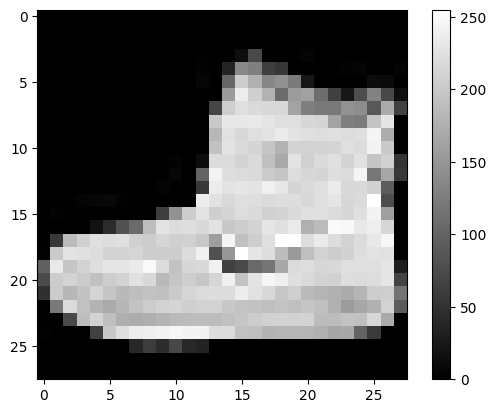

In [3]:
# Візуалізація першого зображення з тренувального датасету
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [3]:
# Нормалізація значень пікселів до діапазону [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Зміна форми зображень для відповідності вхідному формату Conv2D
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [5]:
# Розділення тренувального набору на тренувальний та валідаційний
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

In [6]:
# Перетворення міток у формат one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [7]:
# Перевірка форм даних після перетворення
print("Train images shape:", train_images.shape)
print("Validation images shape:", val_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (48000, 28, 28, 1)
Validation images shape: (12000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)
Train labels shape: (48000, 10)
Validation labels shape: (12000, 10)
Test labels shape: (10000, 10)


# 1. Модель за класичними сценарієм без регуляризації з 10 епохами, "Adam"

In [12]:
model_con1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

In [11]:
model_con1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [13]:
# Компіляція моделі
model_con1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history_1= model_con1.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 [==============================] - 72s 48ms/step - loss: 0.4069 - accuracy: 0.8523 - val_loss: 0.3278 - val_accuracy: 0.8788
Epoch 2/10
1500/1500 [==============================] - 75s 50ms/step - loss: 0.2856 - accuracy: 0.8949 - val_loss: 0.3073 - val_accuracy: 0.8880
Epoch 3/10
1500/1500 [==============================] - 77s 52ms/step - loss: 0.2418 - accuracy: 0.9109 - val_loss: 0.2506 - val_accuracy: 0.9101
Epoch 4/10
1500/1500 [==============================] - 99s 66ms/step - loss: 0.2090 - accuracy: 0.9228 - val_loss: 0.2487 - val_accuracy: 0.9082
Epoch 5/10
1500/1500 [==============================] - 89s 59ms/step - loss: 0.1834 - accuracy: 0.9317 - val_loss: 0.2310 - val_accuracy: 0.9150
Epoch 6/10
1500/1500 [==============================] - 83s 55ms/step - loss: 0.1613 - accuracy: 0.9396 - val_loss: 0.2342 - val_accuracy: 0.9163
Epoch 7/10
1500/1500 [==============================] - 71s 47ms/step - loss: 0.1398 - accuracy: 0.9484 - val_loss: 0.2441 -

In [17]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model_con1.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.3111 - accuracy: 0.9127 - 3s/epoch - 11ms/step


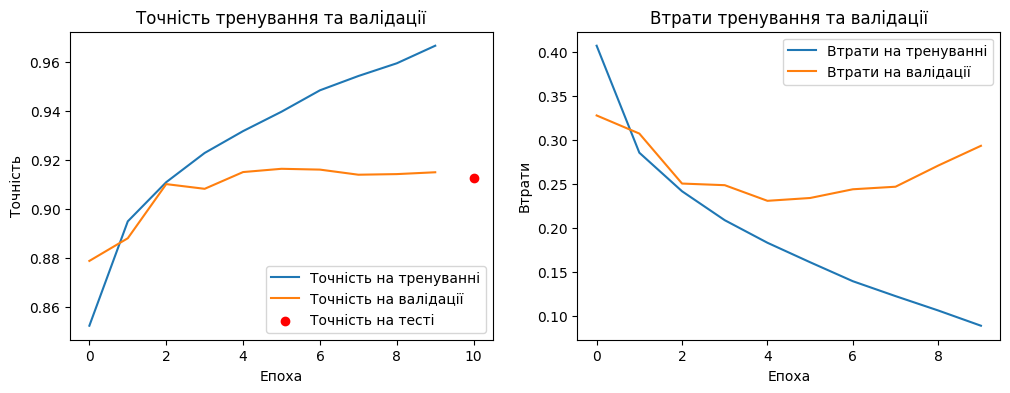

In [18]:
# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Точність на тренуванні')
plt.plot(history_1.history['val_accuracy'], label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history_1.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Втрати на тренуванні')
plt.plot(history_1.history['val_loss'], label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

In [19]:
import numpy as np
from sklearn.metrics import classification_report

# Отримання передбачень для тестових даних
predictions = model_con1.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Отримання індексу класу для кожного зображення
true_classes = np.argmax(test_labels, axis=1)

# Генерація classification report
report = classification_report(true_classes, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.88      0.86      1000
           3       0.93      0.92      0.92      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.78      0.72      0.75      1000
           7       0.95      0.98      0.97      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [25]:
model_con1.save("fashion_mnist_model_con1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Висновок 1.** Модель model_con1. дала високу точність на тренувальних даних але маємо певне перенавчання.

# 2. Модель з оптимізатором 'RMSprop'

In [9]:
model_con2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

In [10]:
# Компіляція моделі
model_con2.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model_con2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [13]:
history_2= model_con2.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 [==============================] - 75s 49ms/step - loss: 0.4513 - accuracy: 0.8343 - val_loss: 0.3046 - val_accuracy: 0.8902
Epoch 2/10
1500/1500 [==============================] - 107s 72ms/step - loss: 0.2858 - accuracy: 0.8968 - val_loss: 0.2644 - val_accuracy: 0.9046
Epoch 3/10
1500/1500 [==============================] - 74s 49ms/step - loss: 0.2438 - accuracy: 0.9115 - val_loss: 0.2470 - val_accuracy: 0.9091
Epoch 4/10
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2158 - accuracy: 0.9225 - val_loss: 0.2511 - val_accuracy: 0.9113
Epoch 5/10
1500/1500 [==============================] - 85s 57ms/step - loss: 0.1936 - accuracy: 0.9306 - val_loss: 0.2383 - val_accuracy: 0.9166
Epoch 6/10
1500/1500 [==============================] - 91s 61ms/step - loss: 0.1778 - accuracy: 0.9357 - val_loss: 0.2361 - val_accuracy: 0.9168
Epoch 7/10
1500/1500 [==============================] - 101s 68ms/step - loss: 0.1642 - accuracy: 0.9405 - val_loss: 0.2627

In [14]:
# Оцінка моделі на тестових даних
test_loss, test_acc = model_con2.evaluate(test_images, test_labels, verbose=2)

313/313 - 4s - loss: 0.3038 - accuracy: 0.9132 - 4s/epoch - 14ms/step


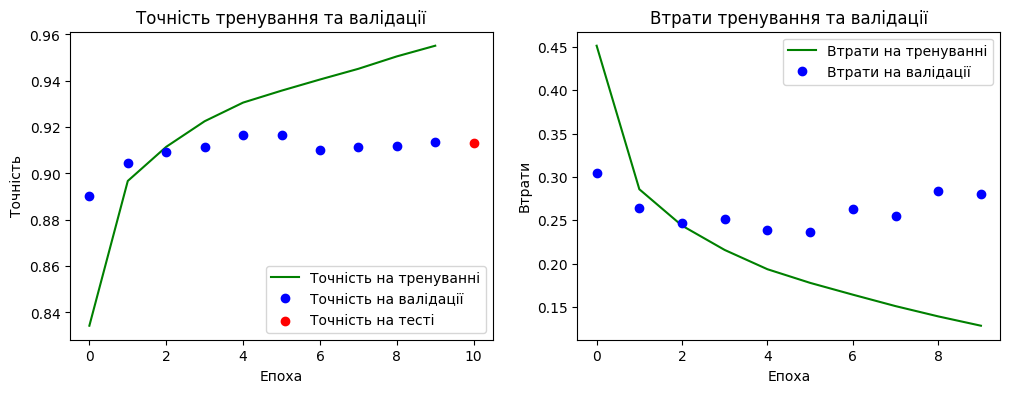

In [40]:
# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], "g", label='Точність на тренуванні')
plt.plot(history_2.history['val_accuracy'], "bo", label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history_2.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], "g", label='Втрати на тренуванні')
plt.plot(history_2.history['val_loss'], "bo", label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

In [16]:
# Отримання передбачень для тестових даних
predictions = model_con2.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Отримання індексу класу для кожного зображення
true_classes = np.argmax(test_labels, axis=1)

# Генерація classification report
report = classification_report(true_classes, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.86      0.86      1000
           3       0.89      0.94      0.92      1000
           4       0.84      0.88      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.72      0.75      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [17]:
model_con2.save("fashion_mnist_model_con2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Висновок 2. Звастосування іншого оптимізатора дало приблизно той самий ефект в плані втрат, точночності (досить високої 0.95-0.96 на тренувальних даних і 0.91 на тестових і валідаційних), інших метрик якості. Маю також перенавчання, що підводить до потреби застосування регуляризатора.

## 3. Модель з оптимізатором Batch Normalization

In [18]:
# Побудова та навчання моделі з Batch Normalization
model_con3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.BatchNormalization(),  # Замінюємо Dropout на BatchNormalization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
# Компіляція моделі
model_con3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model_con3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d (Glob  (None, 64)               

In [21]:
history_3 = model_con3.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 [==============================] - 53s 34ms/step - loss: 0.4621 - accuracy: 0.8335 - val_loss: 0.3621 - val_accuracy: 0.8683
Epoch 2/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.3212 - accuracy: 0.8831 - val_loss: 0.3161 - val_accuracy: 0.8867
Epoch 3/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2787 - accuracy: 0.8980 - val_loss: 0.2943 - val_accuracy: 0.8955
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2541 - accuracy: 0.9062 - val_loss: 0.2852 - val_accuracy: 0.8961
Epoch 5/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2348 - accuracy: 0.9135 - val_loss: 0.3031 - val_accuracy: 0.8911
Epoch 6/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2185 - accuracy: 0.9193 - val_loss: 0.3438 - val_accuracy: 0.8869
Epoch 7/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2047 - accuracy: 0.9239 - val_loss: 0.2664 -

In [22]:
test_loss, test_acc = model_con2.evaluate(test_images, test_labels, verbose=2)

313/313 - 4s - loss: 0.3038 - accuracy: 0.9132 - 4s/epoch - 11ms/step


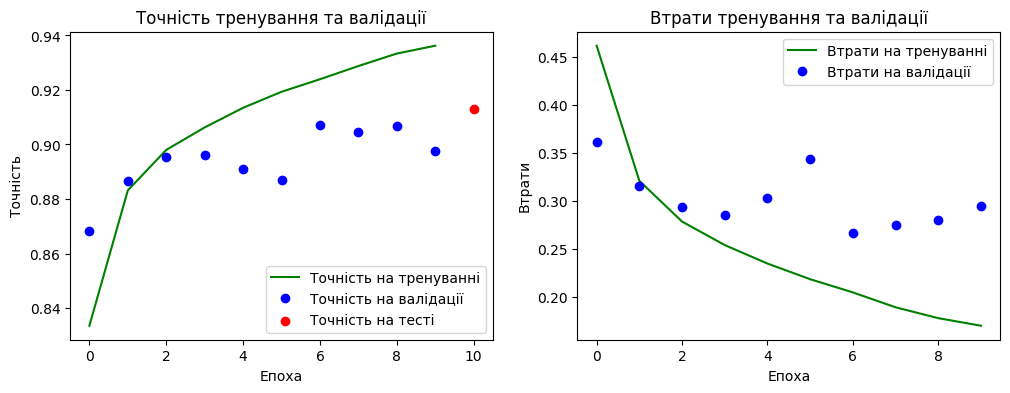

In [39]:
# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], "g", label='Точність на тренуванні')
plt.plot(history_3.history['val_accuracy'], "bo", label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history_3.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], "g", label='Втрати на тренуванні')
plt.plot(history_3.history['val_loss'], "bo", label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

In [29]:
# Отримання передбачень для тестових даних
predictions = model_con3.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Отримання індексу класу для кожного зображення
true_classes = np.argmax(test_labels, axis=1)

# Генерація classification report
report = classification_report(true_classes, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.87      0.85      1000
           3       0.95      0.86      0.90      1000
           4       0.87      0.84      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.73      0.71      0.72      1000
           7       0.92      0.99      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [41]:
model_con3.save ("fashion_mnist_model_con3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Висновок 3.** Мoдель із регуляризатором ранньої зупинки дала трохи нижчий результат точності тренувальних, але точність і інші метрики якості тестових даних були 0.91 як і в попередніх моделях, тобто перенавчання було менше.

# 4. Мoдель із регуляризатором Dropout

In [9]:
# Побудова та навчання моделі з Dropout

model_con4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),  # Замінюємо Flatten на GlobalMaxPooling2D
    tf.keras.layers.Dropout(0.25),  # Додаємо Dropout як регуляризатор
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [10]:
# Компіляція моделі
model_con4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model_con4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d (Glob  (None, 64)                0

In [12]:
history_4 = model_con4.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 [==============================] - 59s 37ms/step - loss: 0.7130 - accuracy: 0.7375 - val_loss: 0.4808 - val_accuracy: 0.8269
Epoch 2/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.4714 - accuracy: 0.8276 - val_loss: 0.3878 - val_accuracy: 0.8568
Epoch 3/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.3991 - accuracy: 0.8524 - val_loss: 0.3452 - val_accuracy: 0.8714
Epoch 4/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.3584 - accuracy: 0.8693 - val_loss: 0.3226 - val_accuracy: 0.8817
Epoch 5/10
1500/1500 [==============================] - 49s 32ms/step - loss: 0.3318 - accuracy: 0.8789 - val_loss: 0.3051 - val_accuracy: 0.8855
Epoch 6/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.3098 - accuracy: 0.8866 - val_loss: 0.2900 - val_accuracy: 0.8948
Epoch 7/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.2938 - accuracy: 0.8920 - val_loss: 0.2828 -

In [13]:
test_loss, test_acc = model_con4.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.2986 - accuracy: 0.8931 - 3s/epoch - 10ms/step


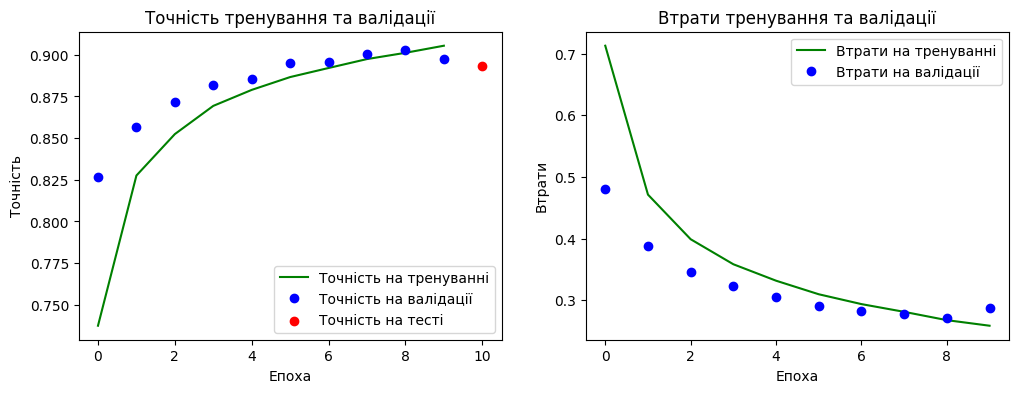

In [14]:
# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_4.history['accuracy'], "g", label='Точність на тренуванні')
plt.plot(history_4.history['val_accuracy'], "bo", label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history_4.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history_4.history['loss'], "g", label='Втрати на тренуванні')
plt.plot(history_4.history['val_loss'], "bo", label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

In [15]:
# Отримання передбачень для тестових даних
predictions = model_con4.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Отримання індексу класу для кожного зображення
true_classes = np.argmax(test_labels, axis=1)

# Генерація classification report
report = classification_report(true_classes, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 8s 24ms/step
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1000
           1       1.00      0.97      0.99      1000
           2       0.75      0.92      0.83      1000
           3       0.89      0.91      0.90      1000
           4       0.87      0.79      0.83      1000
           5       0.99      0.97      0.98      1000
           6       0.78      0.57      0.66      1000
           7       0.97      0.94      0.95      1000
           8       0.96      0.99      0.97      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [16]:
model_con4.save ("fashion_mnist_model_con4.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Висновок 4. Застосування регуляризатора Dropout (0,25) повністю усунуло недонавчання, водночас точність моделі не особливо висока, приблизно 0.90, причому це стосується як навчальних, так і тестових даних. Спробую далі поєднати обоє регуляризаторів і збільшити кількість епох удвічі.

# 5. Модель з Dropout та BatchNormalization, епохи =15

In [17]:
# Побудова та навчання моделі з Dropout та BatchNormalization для зменшення перенавчання (Dropout) та поліпшення загальної стабільності та ефективності моделі (BatchNormalization).

model_con5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(0.25),  # Додаємо Dropout
    tf.keras.layers.BatchNormalization(),  # Додаємо BatchNormalization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [18]:
# Компіляція моделі
model_con5.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model_con5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d_1 (Gl  (None, 64)               

In [20]:
history_5 = model_con5.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels))

Epoch 1/15
1500/1500 [==============================] - 57s 37ms/step - loss: 0.6512 - accuracy: 0.7605 - val_loss: 0.4469 - val_accuracy: 0.8317
Epoch 2/15
1500/1500 [==============================] - 49s 32ms/step - loss: 0.4469 - accuracy: 0.8355 - val_loss: 0.3594 - val_accuracy: 0.8673
Epoch 3/15
1500/1500 [==============================] - 50s 33ms/step - loss: 0.3860 - accuracy: 0.8604 - val_loss: 0.3201 - val_accuracy: 0.8843
Epoch 4/15
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3550 - accuracy: 0.8701 - val_loss: 0.3121 - val_accuracy: 0.8824
Epoch 5/15
1500/1500 [==============================] - 52s 35ms/step - loss: 0.3294 - accuracy: 0.8787 - val_loss: 0.2895 - val_accuracy: 0.8937
Epoch 6/15
1500/1500 [==============================] - 50s 33ms/step - loss: 0.3174 - accuracy: 0.8846 - val_loss: 0.2994 - val_accuracy: 0.8913
Epoch 7/15
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3003 - accuracy: 0.8893 - val_loss: 0.3864 -

In [21]:
test_loss, test_acc = model_con5.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.2841 - accuracy: 0.8980 - 3s/epoch - 9ms/step


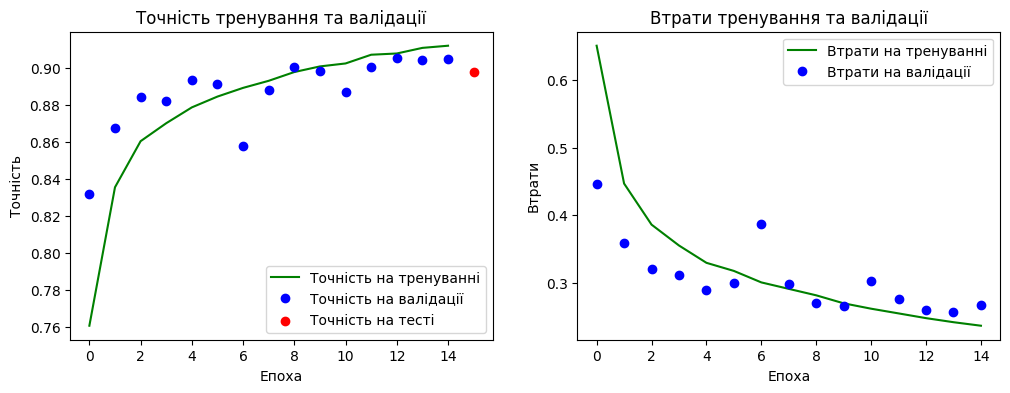

In [23]:
# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_5.history['accuracy'], "g", label='Точність на тренуванні')
plt.plot(history_5.history['val_accuracy'], "bo", label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history_5.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history_5.history['loss'], "g", label='Втрати на тренуванні')
plt.plot(history_5.history['val_loss'], "bo", label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

In [24]:
# Отримання передбачень для тестових даних
predictions = model_con5.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Отримання індексу класу для кожного зображення
true_classes = np.argmax(test_labels, axis=1)

# Генерація classification report
report = classification_report(true_classes, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.81      0.83      1000
           3       0.89      0.91      0.90      1000
           4       0.75      0.92      0.83      1000
           5       0.97      0.98      0.98      1000
           6       0.76      0.65      0.70      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [25]:
model_con5.save ("fashion_mnist_model_con5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Висновок 5. Модель з двома регуляризаторами зберегла відповідність тестових даних до навчальних, але точність і далі залишається недостатньою.
Спробую, використовуючи модель з Dropout, збільшити швидкість навчання і додати розмір вибірки за рахунок створення генератора



# 6. Збільшення в моделі розмірності вибірки за допомогою генератора

записала весь код, включаючи препроцессінг, щоби не плутатися, оскільки як loss використала'sparse_categorical_crossentropy'

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Завантаження датасету Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Розширення розмірності зображень для відповідності формату, очікуваному Conv2D шарами
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Нормалізація піксельних значень до діапазону [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Створення об'єкта генератора даних з параметрами аугментації для навчальних даних
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Генератор даних для навчального набору
train_generator = train_datagen.flow(train_images, train_labels, batch_size=64)

# Генератор даних для валідаційного набору без аугментації
validation_datagen = ImageDataGenerator()

# Генератор даних для валідаційного набору
validation_generator = validation_datagen.flow(test_images, test_labels, batch_size=64)

# Визначення моделі
model_con6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Глибина вхідного шару 1
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dropout(0.25),  # Додаємо Dropout

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model_con6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Тренування моделі з використанням генератора даних
history_6= model_con6.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)


Epoch 1/30
938/938 [==============================] - 97s 102ms/step - loss: 0.9578 - accuracy: 0.6403 - val_loss: 0.6222 - val_accuracy: 0.7546
Epoch 2/30
938/938 [==============================] - 73s 78ms/step - loss: 0.6893 - accuracy: 0.7424 - val_loss: 0.5108 - val_accuracy: 0.8182
Epoch 3/30
938/938 [==============================] - 77s 82ms/step - loss: 0.6102 - accuracy: 0.7727 - val_loss: 0.4540 - val_accuracy: 0.8328
Epoch 4/30
938/938 [==============================] - 110s 117ms/step - loss: 0.5591 - accuracy: 0.7918 - val_loss: 0.4297 - val_accuracy: 0.8406
Epoch 5/30
938/938 [==============================] - 96s 102ms/step - loss: 0.5242 - accuracy: 0.8055 - val_loss: 0.4126 - val_accuracy: 0.8536
Epoch 6/30
938/938 [==============================] - 116s 123ms/step - loss: 0.5071 - accuracy: 0.8106 - val_loss: 0.3941 - val_accuracy: 0.8543
Epoch 7/30
938/938 [==============================] - 94s 100ms/step - loss: 0.4900 - accuracy: 0.8191 - val_loss: 0.3850 - val_ac

In [2]:
model_con6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 global_max_pooling2d (Glob  (None, 64)                0

In [3]:
test_loss, test_acc = model_con6.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.3095 - accuracy: 0.8896 - 3s/epoch - 8ms/step


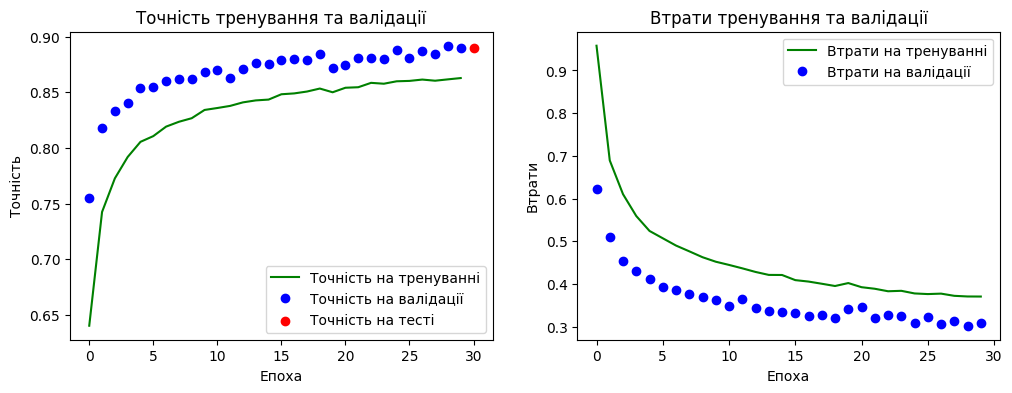

In [6]:
# Побудова графіку точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_6.history['accuracy'], "g", label='Точність на тренуванні')
plt.plot(history_6.history['val_accuracy'], "bo", label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title('Точність тренування та валідації')
plt.legend()

# Додавання тестової точності до графіку
plt.scatter(len(history_6.history['accuracy']), test_acc, label='Точність на тесті', color='red')
plt.legend()

# Побудова графіку втрат
plt.subplot(1, 2, 2)
plt.plot(history_6.history['loss'], "g", label='Втрати на тренуванні')
plt.plot(history_6.history['val_loss'], "bo", label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title('Втрати тренування та валідації')
plt.legend()

In [13]:
import numpy as np
from sklearn.metrics import classification_report

# Отримання передбачень для тестових даних
predictions = model_con6.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Генерація classification report
report = classification_report(test_labels, predicted_classes)

# Вивід результатів
print(report)

313/313 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.85      0.85      1000
           3       0.92      0.87      0.89      1000
           4       0.86      0.79      0.83      1000
           5       0.96      0.98      0.97      1000
           6       0.65      0.72      0.68      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [10]:
model_con6.save ("fashion_mnist_model_con6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Висновок 6.**  Створення генератора для розширення тренувальної та тестової бази даних ускладнило навчання моделі, оскільки точність навчальних даних весь час відставла від точності валідаційних. Кількість епох застосовувала різні, починаючи від 10, 15 і далі використала 30 щоби дати моделі можливість більше навчитися. Але і при цьому, точність моделі досягла лише районі 0.86, причому валідаційні дані мали вищу точність на рівні 0,89. Загалом,це суттєво нижче, ніж у попередніх моделей.

**ВИСНОВОК ДЗ:** найвищі показники точності і інших метрик було досягнуто в моделі із використанням регуляризатора Dropout, Dropout і BatchNormalization. В моделях без регуляризації була вищі точність навчальних даних і нижча тестових, що свідчить про перенавачання. В завдання із генератором відмічала тривале навчання із елементами недонавчання і низькими показниками метрик якості.